In [131]:
import pandas as pd

import pandas.tseries
import statsmodels.api as sm
import matplotlib.pyplot as pl

import numpy as np

In [132]:
# Load the 'co2' dataset from sm.datasets
data_set = sm.datasets.co2.load()

# load in the data_set into pandas data_frame
df = pd.DataFrame(data=data_set['data'])
df.rename(columns={'index': 'date'}, inplace=True)

# set index to date column
df.set_index('date', inplace=True)
df.head()

,co2
date,
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


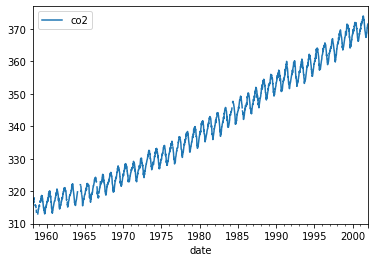

In [133]:
df.plot()

In [134]:
df = df.groupby(pd.Grouper(freq='M')).mean()

In [135]:
df.ffill(inplace = True)

In [91]:
df = np.log(df)

In [113]:
df = df.diff(periods = 1)

In [93]:
df.max()

co2    0.008107
dtype: float64

In [94]:
from statsmodels.tsa.stattools import adfuller\

dftest=adfuller(df['co2'][1:])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '# Lags Used', 'Number of Observations Used'])

for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                  -5.117670
p-value                          0.000013
# Lags Used                     19.000000
Number of Observations Used    505.000000
Critical Value (1%)             -3.443366
Critical Value (5%)             -2.867280
Critical Value (10%)            -2.569827
dtype: float64


In [95]:
df

,co2
date,
1958-03-31,NaN
1958-04-30,0.003474
1958-05-31,0.000735
1958-06-30,0.000000
1958-07-31,-0.005713
...,...
2001-08-31,-0.005063
2001-09-30,-0.004191
2001-10-31,0.000462


## ACF and PACF

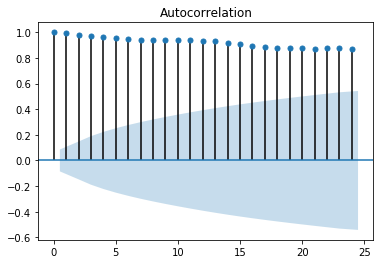

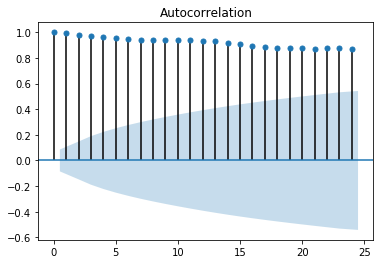

In [139]:
#ACF/PACF to determine which terms in include (MA or AR or Both?)

from statsmodels.graphics.tsaplots import plot_acf
#plot autocorrelation for each lag (alpha is confidence interval)
plot_acf(df['co2'], alpha=.05, lags = 24)


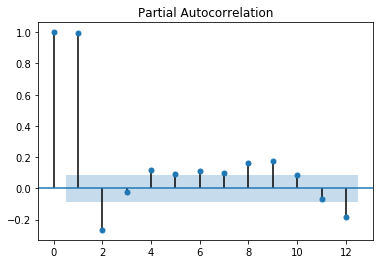

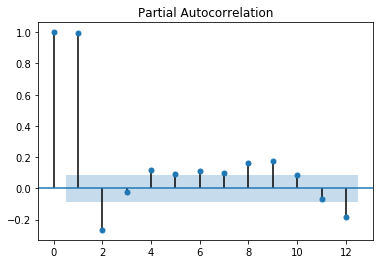

In [138]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['co2'], alpha=.05, lags=12)

## Arima Model

In [142]:
from statsmodels.tsa.arima_model import ARIMA
#fit ARIMA model (3,1,0))

model = ARIMA(df['co2'], order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.co2   No. Observations:                  525
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -823.952
Method:                       css-mle   S.D. of innovations              1.162
Date:                Tue, 09 Jun 2020   AIC                           1655.904
Time:                        20:46:17   BIC                           1672.958
Sample:                    04-30-1958   HQIC                          1662.582
                         - 12-31-2001                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1083      0.009     11.744      0.000       0.090       0.126
ar.L1.D.co2     0.8654      0.026     33.400      0.000       0.815       0.916
ma.L1.D.co2    -0.9774      0.009   -108.863    

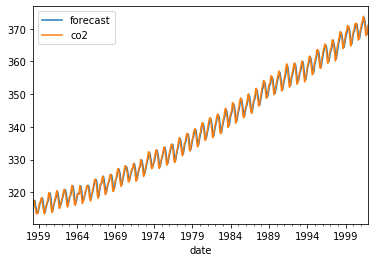

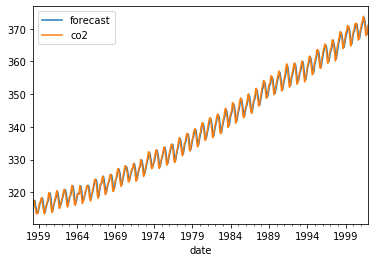

In [144]:
model_fit.plot_predict()

## Arima(X) model

In [155]:
# model = pf.ARIMAX(data=df['co2'][1:], formula='drivers~1+seat_belt+oil_crisis',
#                   ar=1, ma=1, family=pf.Normal())

mod = sm.tsa.statespace.SARIMAX(df['co2'][1:], order=(2,1,2))

x = model.fit()
x.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.co2   No. Observations:                  525
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -823.952
Method:                       css-mle   S.D. of innovations              1.162
Date:                Tue, 09 Jun 2020   AIC                           1655.904
Time:                        20:53:30   BIC                           1672.958
Sample:                    04-30-1958   HQIC                          1662.582
                         - 12-31-2001                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1083      0.009     11.744      0.000       0.090       0.126
ar.L1.D.co2     0.8654      0.026     33.400      0.000       0.815       0.916
ma.L1.D.co2    -0.9774      0.009   -108.863      0.000      -0.995      -0.960
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1555           +0.0000j            1.1555            0.0000
MA.1            1.0231           +0.0000j            1.0231            0.0000
-----------------------------------------------------------------------------
"""

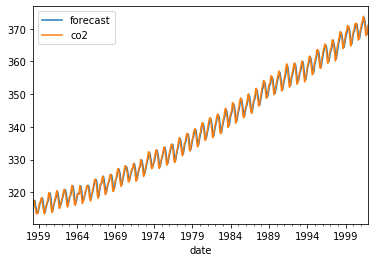

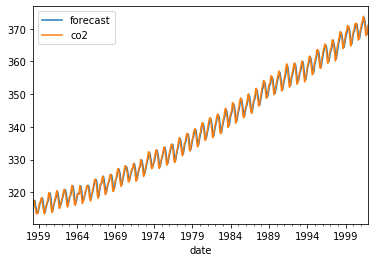

In [156]:
x.plot_predict()